In [3]:
import yfinance as yf
import pandas as pd

# Download AAPL data
df = yf.download('AAPL', start='2010-01-01', end='2024-11-21')

# Display the first few rows
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04,6.447411,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.458560,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.355826,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.344078,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.386255,7.570714,7.571429,7.466429,7.510714,447610800


In [4]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-11-14,228.220001,228.220001,228.869995,225.000000,225.020004,44923900
2024-11-15,225.000000,225.000000,226.919998,224.270004,226.399994,47923700
2024-11-18,228.020004,228.020004,229.740005,225.169998,225.250000,44686000
2024-11-19,228.279999,228.279999,230.160004,226.660004,226.979996,36211800
2024-11-20,229.000000,229.000000,229.929993,225.889999,228.059998,35112500


In [ ]:
df1 = df.reset_index()['Close']
## df.reset_index():
#Resets the index of the DataFrame df.
#Converts the existing index (e.g., Date if it's a time-series dataset) into a regular column.

#['Close']:
#Selects only the Close column from the reset DataFrame.
#The Close column typically contains the closing prices of the AAPL stock for each trading day.

In [8]:
df1

Ticker,AAPL
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
3742,228.220001
3743,225.000000
3744,228.020004
3745,228.279999


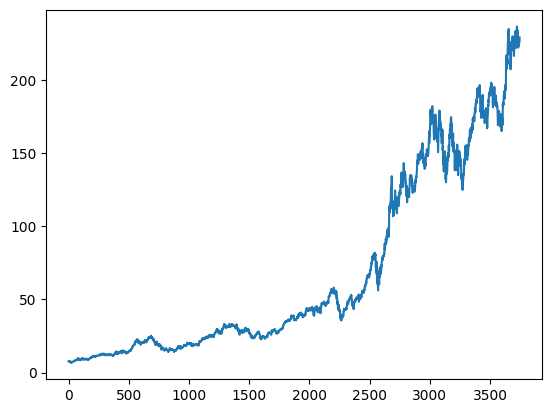

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
## LSTM are sensitive to the scale of the data . So we apply Minmax scaler

In [10]:
import numpy as np

In [11]:
df1

Ticker,AAPL
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
3742,228.220001
3743,225.000000
3744,228.020004
3745,228.279999


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.00341556]
 [0.00347311]
 [0.00294274]
 ...
 [0.96315673]
 [0.964289  ]
 [0.96742461]]


In [14]:
## splitting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

#0:training_size:
#Selects rows from the 0th index (start) up to, but not including, training_size.
##, ::
#Selects all columns (:) in those rows.
#df1[training_size:len(df1), :1]
#df1:
#Again, refers to the 2D array-like structure.
#training_size:len(df1):
#Selects rows starting from training_size to the last row (len(df1)).
#, :1:
#Selects the first column only (:1 slices from the 0th column to, but not including, the 1st column).

In [15]:
training_size,test_size

(2435, 1312)

In [16]:
train_data

array([[0.00341556],
       [0.00347311],
       [0.00294274],
       ...,
       [0.19408528],
       [0.19788503],
       [0.20233801]])

In [17]:
import numpy
#convert an array of values into dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)    

In [18]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test , y_test = create_dataset(test_data,time_step)

In [19]:
print(X_train.shape),print(y_train.shape)

(2334, 100)
(2334,)


(None, None)

In [20]:
print(X_test.shape),print(y_test.shape)

(1211, 100)
(1211,)


(None, None)

In [21]:
## reshape input to be [samples,time steps , features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [22]:
## Create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')

c:\Users\Amritanshu Bhardwaj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 6.1382e-05 - val_loss: 0.0022
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 4.0997e-05 - val_loss: 0.0019
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 4.2195e-05 - val_loss: 0.0031
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 4.5441e-05 - val_loss: 0.0046
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 4.2038e-05 - val_loss: 0.0042
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 4.1792e-05 - val_loss: 0.0039
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 4.0713e-05 - val_loss: 0.0044
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 3.5744e-05 - val_loss: 0.0056
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 3.4491e-05 - val_loss: 0.0043
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 3.1003e-05 - val_loss: 0.0035
Epoch 12/100

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.17.0'

In [29]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [30]:
# Transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [31]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

29.856645659111265

In [32]:
math.sqrt(mean_squared_error(y_test,test_predict))

147.06078017688122